# Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

A **support vector machine (SVM)** is another Machine learning model, capable of 

* linear or non-linear classification
* regression
* outlier detection

It is one of the most popular machine learning models, and is well suited for *complicated small or medium sized datasets.*

# Linear SVM Classification

You can think of an SVM classifier as fitting the widest possible street (parallel dashed lines) between various classes. This is called **large margin classification**. 

* The solid line on the right plot is called the **decision boundary**. It seperates the two classes and stays as far away as possible from the closest training instances.

* The dashed lines on the right plot give the boundaries of the street. They are fully determined (or "supported") by the instances located on the edge of the street. These instances are called **support vectors**.

![](chap5pic1.png)

Note that this only works if the data is linearly seperable. If not, then a hyperparameter $C$ should be used; it makesa trade-off between street size and margin violations

![](chap5pic2.png)

Although the first one makes more margin violations, chances are it will generalize better.

Lets obtain the iris dataset from before.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris['data'][:,2::]
y = (iris['target'] == 2).astype(np.float64) # now include all 3 plants

Use SVM classification

In [3]:
svm_clf = Pipeline((
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(C=1, loss='hinge'))
    ))
svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

Function for plotting.

In [4]:
def plot_predictions(clf, lims):
    # Arrays of points we want to predict
    x0s = np.linspace(lims[0], lims[1], 100)
    x1s = np.linspace(lims[2], lims[3], 100)
    # Form into meshgrid
    x0, x1 = np.meshgrid(x0s, x1s)
    # Form into array where each element is (x1,x2)
    X = np.c_[x0.ravel(), x1.ravel()]
    # Make predictions based on data
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    #plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.colorbar()

## "Wide Street" C=1

Note that positive values are identified as the class but negative values aren't.

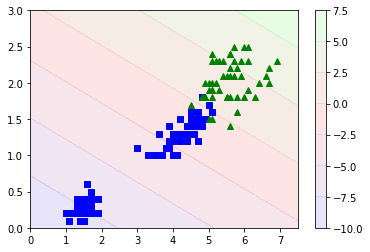

In [5]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(svm_clf, [0, 7.5, 0, 3])

## "Narrow Street" C=100

In [6]:
svm_clf = Pipeline((
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(C=100, loss='hinge'))
    ))
svm_clf.fit(X,y)

/Users/lukepolson/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

## C=100 Plot

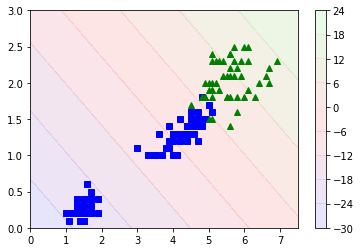

In [7]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(svm_clf, [0, 7.5, 0, 3])

Notice that the contours change as we require the street to be narrower. While $C=100$ might do better for the training set, it is likely "overfitting" the data; $C=1$ makes more errors but will probably generalize better.

# Non-Linear SVM Classification

Sometimes the data isn't linear seperable and we need more complicated deicsion boundaries. Consider the data set below.

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

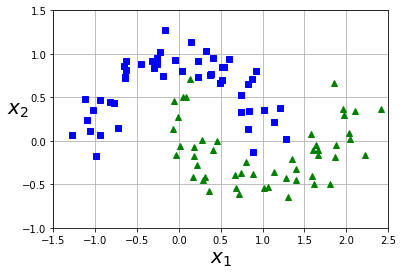

In [9]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

We can add more polynomial features to this data set before training the SVM classifier. Now in addition to just $x_1$ and $x_2$, we also have $1$, $x_1^2$, $x_2^2$, $x_1x_2$, $x_1x_2^2$, $x_1^2x_2$, $x_1^3$, $x_2^3$.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

While the boundary is linear in the 10-dimensional space of all the parameters, when it is moved back into $x_1$ and $x_2$ space, it has an interesting shape. Once again, positive entries are identified as one class and negative the other.

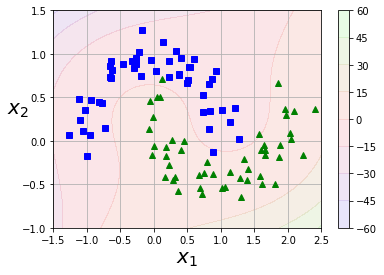

In [11]:
def plot_predictions(clf, axes):
    # Arrays of points we want to predict
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    # Form into meshgrid
    x0, x1 = np.meshgrid(x0s, x1s)
    # Form into array where each element is (x1,x2)
    X = np.c_[x0.ravel(), x1.ravel()]
    # Make predictions based on data
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    #plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.colorbar()

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Kernel

* For very complicated datasets, a low polynomial degree can't deal with complex features
* A high polynomial degree creates a huge number of features, making the model slow to run

There is something called the **kernel trick** which allows one to get the same result as if they added many polynomial features, but without actually having to add them. This trick is implemented by the SVC class. Note that

* $C$ controls the boundary overlap
* degree is the dimension of the polynomial
* coef0  controls how influenced the model is by high degree polynomials

In [12]:
from sklearn.svm import SVC
poly_kernel_svm_clf_deg3 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
    ))
poly_kernel_svm_clf_deg10 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
    ))

poly_kernel_svm_clf_deg3.fit(X,y)
poly_kernel_svm_clf_deg10.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Plot the predictions of our two different models.

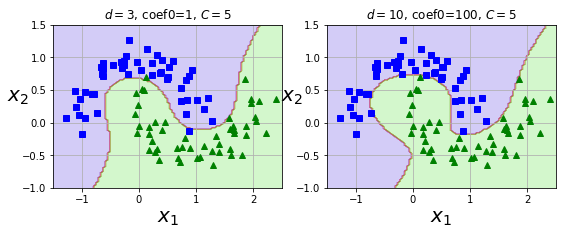

In [13]:
def plot_predictions(clf, lims):
    # Arrays of points we want to predict
    x0s = np.linspace(lims[0], lims[1], 100)
    x1s = np.linspace(lims[2], lims[3], 100)
    # Form into meshgrid
    x0, x1 = np.meshgrid(x0s, x1s)
    # Form into array where each element is (x1,x2)
    X = np.c_[x0.ravel(), x1.ravel()]
    # Make predictions based on data
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf_deg3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$d=3$, coef0=1, $C=5$')

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf_deg10, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$d=10$, coef0=100, $C=5$')

plt.show()

## Similarity Features

While adding additional polynomials such as $x_1x_2$, $x_2^3x_1^5$, etc.. to each data point is one way of generating extra features, another way is using a **similarity function** that determines how much each instance resembles a particular landmark. For this we use the *Gaussian Radial Bases Function*:

$$\phi_{\gamma}(\mathbf{x}, l)=e^{-\gamma|\mathbf{x}-l|^2} $$

where $\mathbf{x}$ is some data point (can be multidimensional) $l$ is the location of the landmark in data-space and $\gamma$ is a scaling factor.

The kernel trick can be used again to obtain many similarity features for a particular data set. In this particular method, a landmark is placed at every data point.

In [14]:
rbf_kernel_svm_clf1 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
    ])
rbf_kernel_svm_clf2 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
    ])
rbf_kernel_svm_clf3 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf4 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
    ])

rbf_kernel_svm_clf1.fit(X, y)
rbf_kernel_svm_clf2.fit(X, y)
rbf_kernel_svm_clf3.fit(X, y)
rbf_kernel_svm_clf4.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

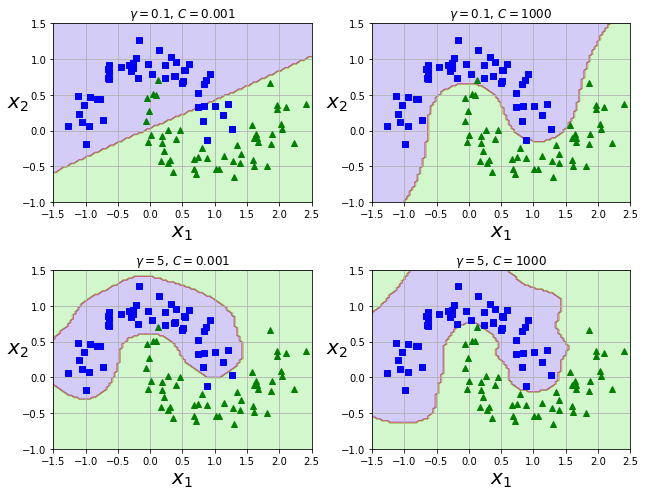

In [15]:
plt.figure(figsize=(9, 7))
plt.subplot(221)
plot_predictions(rbf_kernel_svm_clf1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$\gamma=0.1$, $C=0.001$')

plt.subplot(222)
plot_predictions(rbf_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$\gamma=0.1$, $C=1000$')

plt.subplot(223)
plot_predictions(rbf_kernel_svm_clf3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$\gamma=5$, $C=0.001$')

plt.subplot(224)
plot_predictions(rbf_kernel_svm_clf4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$\gamma=5$, $C=1000$')

plt.tight_layout()
plt.show()

As a general rule:

* **If the model is overfitting** then reduce $\gamma$ and reduce $C$. A large value of $\gamma$ corresponds to a narrow bell-shaped curve where each instance has a smaller range of influence, so the decision boundary is irregular and ends up wiggling around individual instances.

* **If the model is underfitting** then increase $\gamma$ and increase $C$. A small value of $\gamma$ corresponds to a wide bell-shaped curve where each instance has a larger range of influence. As $\gamma \to 0$ all instances have the same parameter, and the similarity features do nothing (so increase to get more effect).

# Exercises

## 1

Support vector machines are models that seperate classes from one another in such a way that the largest margin between the decision boundary is created between classes. During soft margin classification (where class instances overlap) the SVM looks for a compromise between perfectly seperating the two classes AND having the widest possible street. When data sets are not linearly seperable, kernels can be used (polynomial, similarity features, etc..).

## 2

A support vector is any instane lying on the "street" after the model has been fit. The decision boundary is determined entirely by support vectors; any instance that is not a support vector has no influence on the model whatsoever. They can be removed, moved around, or more instances could be added off the street, and nothing would happen to the model. Thus any predictions made depends entirely on support vectors.

## 3

Since SVM tries to fit the largest possible street between classes, SVMS will tend to ignore features of smaller magnitude.

## 4

An SVM can only output a confidence score when trying to classify an instance. The confidence score is related to the distance between the test instance and the decision boundary. However, if one sets probability=True when creating an SVM then after training ir will calibrate probabilities using Logistic Regression on the SVM's scores (using 5-fold cross validation), and this adds the methods predict_proba() and predict_log_proba() to the SVM.

## 6

If the model is underfitting:

* Increase C so street is narrower and less instances appear on the street
* Increase $\gamma$ so that similarity features are more important

# Training a SVM on California Data Set

## Get Training and Test Set

In [24]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from scipy.stats import reciprocal, uniform

Recall what each parameter does:

* $\gamma$ defines the strength of similarity features.
* $C$ (in this case) is the regularization term (higher C means error term with model parameter increases in the cost function)
* $\epsilon$ defines the width of the street for SVM Regression

We do a randomized grid search where we change the 3 parameters to find the optimal model.

In [103]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.08, 0.15), "C": uniform(1, 12), "epsilon":uniform(0.1,0.6)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=30, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=5.49448142616835, epsilon=0.6704285838459496, gamma=0.12674337402161265 
[CV]  C=5.49448142616835, epsilon=0.6704285838459496, gamma=0.12674337402161265, total=   0.0s
[CV] C=5.49448142616835, epsilon=0.6704285838459496, gamma=0.12674337402161265 
[CV]  C=5.49448142616835, epsilon=0.6704285838459496, gamma=0.12674337402161265, total=   0.0s
[CV] C=5.49448142616835, epsilon=0.6704285838459496, gamma=0.12674337402161265 
[CV]  C=5.49448142616835, epsilon=0.6704285838459496, gamma=0.12674337402161265, total=   0.0s
[CV] C=8.18390181036444, epsilon=0.19361118426546192, gamma=0.08824227362416746 
[CV]  C=8.18390181036444, epsilon=0.19361118426546192, gamma=0.08824227362416746, total=   0.0s
[CV] C=8.18390181036444, epsilon=0.19361118426546192, gamma=0.08824227362416746 
[CV]  C=8.18390181036444, epsilon=0.19361118426546192, gamma=0.08824227362416746, total=   0.0s
[CV] C=8.18390181036444, epsilon=0.19361118426546192, gamma=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=9.496870933552547, epsilon=0.11235069657748148, gamma=0.14718942557705753, total=   0.0s
[CV] C=10.98931168960506, epsilon=0.22740346640696568, gamma=0.08968678049438061 
[CV]  C=10.98931168960506, epsilon=0.22740346640696568, gamma=0.08968678049438061, total=   0.0s
[CV] C=10.98931168960506, epsilon=0.22740346640696568, gamma=0.08968678049438061 
[CV]  C=10.98931168960506, epsilon=0.22740346640696568, gamma=0.08968678049438061, total=   0.0s
[CV] C=10.98931168960506, epsilon=0.22740346640696568, gamma=0.08968678049438061 
[CV]  C=10.98931168960506, epsilon=0.22740346640696568, gamma=0.08968678049438061, total=   0.0s
[CV] C=3.200854118241206, epsilon=0.28254534577572266, gamma=0.111262588720802 
[CV]  C=3.200854118241206, epsilon=0.28254534577572266, gamma=0.111262588720802, total=   0.0s
[CV] C=3.200854118241206, epsilon=0.28254534577572266, gamma=0.111262588720802 
[CV]  C=3.200854118241206, epsilon=0.28254534577572266, gamma=0.111262588720802, total=   0.0s
[CV] C=3.2008541

[CV]  C=5.281039920323071, epsilon=0.26856070581242847, gamma=0.11252440055872782, total=   0.0s
[CV] C=2.6910906996971518, epsilon=0.5813181884524238, gamma=0.08383828920220598 
[CV]  C=2.6910906996971518, epsilon=0.5813181884524238, gamma=0.08383828920220598, total=   0.0s
[CV] C=2.6910906996971518, epsilon=0.5813181884524238, gamma=0.08383828920220598 
[CV]  C=2.6910906996971518, epsilon=0.5813181884524238, gamma=0.08383828920220598, total=   0.0s
[CV] C=2.6910906996971518, epsilon=0.5813181884524238, gamma=0.08383828920220598 
[CV]  C=2.6910906996971518, epsilon=0.5813181884524238, gamma=0.08383828920220598, total=   0.0s
[CV] C=12.842643239206208, epsilon=0.5633468615779944, gamma=0.0906441166114602 
[CV]  C=12.842643239206208, epsilon=0.5633468615779944, gamma=0.0906441166114602, total=   0.0s
[CV] C=12.842643239206208, epsilon=0.5633468615779944, gamma=0.0906441166114602 
[CV]  C=12.842643239206208, epsilon=0.5633468615779944, gamma=0.0906441166114602, total=   0.0s
[CV] C=12.84

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=30, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2862ab70>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2862aa20>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2862aef0>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

Obtain each parameter set ($C_i$, $\gamma_i$, $\epsilon_i$) along with the scores $s_i$.

In [106]:
results = rnd_search_cv.cv_results_

Cs = np.array(results['param_C'], dtype=float)
epsilons = np.array(results['param_epsilon'], dtype=float)
gammas = np.array(results['param_gamma'], dtype=float)
scores = np.array(results['mean_test_score'], dtype=float)

Text(0.5, 1.0, 'Size of Points $\\propto$ $\\gamma$')

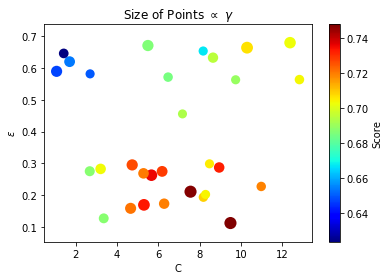

In [100]:
plt.scatter(Cs, epsilons, s=1000*gammas, c=scores, cmap="jet", lw=0)
plt.xlabel('C')
plt.ylabel(r'$\epsilon$')
plt.colorbar(points, label='Score')
plt.title('Size of Points $\propto$ $\gamma$')

In [127]:
from sklearn.metrics import mean_squared_error
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.6183397322655391

## OR USE SMALLER SAMPLE TO COMPUTE MORE COMBINATIONS MORE QUICKLY

Only use first 1000 values of data, but use cross validation on more parameter combinations. Since there was not much dependence on gamma before we set it to $\gamma = 0.12$.

In [123]:
param_distributions = {"C": uniform(3, 17), "epsilon":uniform(0.05,0.4)}
rnd_search_cv_small = RandomizedSearchCV(SVR(gamma=0.12), param_distributions, n_iter=1000, verbose=2, cv=3, random_state=42)
rnd_search_cv_small.fit(X_train_scaled[0:1000], y_train[0:1000])

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV] C=9.367182020405163, epsilon=0.43028572256396647 ................
[CV] . C=9.367182020405163, epsilon=0.43028572256396647, total=   0.0s
[CV] C=9.367182020405163, epsilon=0.43028572256396647 ................
[CV] . C=9.367182020405163, epsilon=0.43028572256396647, total=   0.0s
[CV] C=9.367182020405163, epsilon=0.43028572256396647 ................
[CV] . C=9.367182020405163, epsilon=0.43028572256396647, total=   0.0s
[CV] C=15.443897010793886, epsilon=0.28946339367881463 ...............
[CV]  C=15.443897010793886, epsilon=0.28946339367881463, total=   0.0s
[CV] C=15.443897010793886, epsilon=0.28946339367881463 ...............
[CV]  C=15.443897010793886, epsilon=0.28946339367881463, total=   0.0s
[CV] C=15.443897010793886, epsilon=0.28946339367881463 ...............
[CV]  C=15.443897010793886, epsilon=0.28946339367881463, total=   0.0s
[CV] C=5.652316887521421, epsilon=0.11239780813448107 ................
[CV] . C=5.6

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . C=5.652316887521421, epsilon=0.11239780813448107, total=   0.0s
[CV] C=3.987421406859391, epsilon=0.39647045830997407 ................
[CV] . C=3.987421406859391, epsilon=0.39647045830997407, total=   0.0s
[CV] C=3.987421406859391, epsilon=0.39647045830997407 ................
[CV] . C=3.987421406859391, epsilon=0.39647045830997407, total=   0.0s
[CV] C=3.987421406859391, epsilon=0.39647045830997407 ................
[CV] . C=3.987421406859391, epsilon=0.39647045830997407, total=   0.0s
[CV] C=13.21895519963455, epsilon=0.3332290311184182 .................
[CV] .. C=13.21895519963455, epsilon=0.3332290311184182, total=   0.0s
[CV] C=13.21895519963455, epsilon=0.3332290311184182 .................
[CV] .. C=13.21895519963455, epsilon=0.3332290311184182, total=   0.0s
[CV] C=13.21895519963455, epsilon=0.3332290311184182 .................
[CV] .. C=13.21895519963455, epsilon=0.3332290311184182, total=   0.0s
[CV] C=3.3499364030286416, epsilon=0.43796394086479773 ...............
[CV]  

[CV] .. C=7.399259687200288, epsilon=0.3150089137415928, total=   0.0s
[CV] C=7.399259687200288, epsilon=0.3150089137415928 .................
[CV] .. C=7.399259687200288, epsilon=0.3150089137415928, total=   0.0s
[CV] C=8.299088293519986, epsilon=0.2580272084711243 .................
[CV] .. C=8.299088293519986, epsilon=0.2580272084711243, total=   0.0s
[CV] C=8.299088293519986, epsilon=0.2580272084711243 .................
[CV] .. C=8.299088293519986, epsilon=0.2580272084711243, total=   0.0s
[CV] C=8.299088293519986, epsilon=0.2580272084711243 .................
[CV] .. C=8.299088293519986, epsilon=0.2580272084711243, total=   0.0s
[CV] C=12.294074748835754, epsilon=0.12394178221021082 ...............
[CV]  C=12.294074748835754, epsilon=0.12394178221021082, total=   0.0s
[CV] C=12.294074748835754, epsilon=0.12394178221021082 ...............
[CV]  C=12.294074748835754, epsilon=0.12394178221021082, total=   0.0s
[CV] C=12.294074748835754, epsilon=0.12394178221021082 ...............
[CV]  

[CV] . C=15.40330503174709, epsilon=0.30502298854208526, total=   0.0s
[CV] C=18.082616623797552, epsilon=0.23888597006477974 ...............
[CV]  C=18.082616623797552, epsilon=0.23888597006477974, total=   0.0s
[CV] C=18.082616623797552, epsilon=0.23888597006477974 ...............
[CV]  C=18.082616623797552, epsilon=0.23888597006477974, total=   0.0s
[CV] C=18.082616623797552, epsilon=0.23888597006477974 ...............
[CV]  C=18.082616623797552, epsilon=0.23888597006477974, total=   0.0s
[CV] C=5.033102180951129, epsilon=0.335297914889198 ..................
[CV] ... C=5.033102180951129, epsilon=0.335297914889198, total=   0.0s
[CV] C=5.033102180951129, epsilon=0.335297914889198 ..................
[CV] ... C=5.033102180951129, epsilon=0.335297914889198, total=   0.0s
[CV] C=5.033102180951129, epsilon=0.335297914889198 ..................
[CV] ... C=5.033102180951129, epsilon=0.335297914889198, total=   0.0s
[CV] C=15.933345826487257, epsilon=0.2745108790277985 ................
[CV] .

[CV] . C=10.095987053529242, epsilon=0.1388431241882921, total=   0.0s
[CV] C=10.095987053529242, epsilon=0.1388431241882921 ................
[CV] . C=10.095987053529242, epsilon=0.1388431241882921, total=   0.0s
[CV] C=5.037711244672607, epsilon=0.18504606856145117 ................
[CV] . C=5.037711244672607, epsilon=0.18504606856145117, total=   0.0s
[CV] C=5.037711244672607, epsilon=0.18504606856145117 ................
[CV] . C=5.037711244672607, epsilon=0.18504606856145117, total=   0.0s
[CV] C=5.037711244672607, epsilon=0.18504606856145117 ................
[CV] . C=5.037711244672607, epsilon=0.18504606856145117, total=   0.0s
[CV] C=19.029464966512826, epsilon=0.17928117280830208 ...............
[CV]  C=19.029464966512826, epsilon=0.17928117280830208, total=   0.0s
[CV] C=19.029464966512826, epsilon=0.17928117280830208 ...............
[CV]  C=19.029464966512826, epsilon=0.17928117280830208, total=   0.0s
[CV] C=19.029464966512826, epsilon=0.17928117280830208 ...............
[CV]  

[CV]  C=11.705581991087776, epsilon=0.14059831007917517, total=   0.0s
[CV] C=11.705581991087776, epsilon=0.14059831007917517 ...............
[CV]  C=11.705581991087776, epsilon=0.14059831007917517, total=   0.0s
[CV] C=13.967937436960648, epsilon=0.11974657160199659 ...............
[CV]  C=13.967937436960648, epsilon=0.11974657160199659, total=   0.0s
[CV] C=13.967937436960648, epsilon=0.11974657160199659 ...............
[CV]  C=13.967937436960648, epsilon=0.11974657160199659, total=   0.0s
[CV] C=13.967937436960648, epsilon=0.11974657160199659 ...............
[CV]  C=13.967937436960648, epsilon=0.11974657160199659, total=   0.0s
[CV] C=14.745941547741921, epsilon=0.20469413852021495 ...............
[CV]  C=14.745941547741921, epsilon=0.20469413852021495, total=   0.0s
[CV] C=14.745941547741921, epsilon=0.20469413852021495 ...............
[CV]  C=14.745941547741921, epsilon=0.20469413852021495, total=   0.0s
[CV] C=14.745941547741921, epsilon=0.20469413852021495 ...............
[CV]  

[CV] . C=15.10704676290811, epsilon=0.14489963499872005, total=   0.0s
[CV] C=15.10704676290811, epsilon=0.14489963499872005 ................
[CV] . C=15.10704676290811, epsilon=0.14489963499872005, total=   0.0s
[CV] C=15.10704676290811, epsilon=0.14489963499872005 ................
[CV] . C=15.10704676290811, epsilon=0.14489963499872005, total=   0.0s
[CV] C=8.531794868707552, epsilon=0.3485965620472097 .................
[CV] .. C=8.531794868707552, epsilon=0.3485965620472097, total=   0.0s
[CV] C=8.531794868707552, epsilon=0.3485965620472097 .................
[CV] .. C=8.531794868707552, epsilon=0.3485965620472097, total=   0.0s
[CV] C=8.531794868707552, epsilon=0.3485965620472097 .................
[CV] .. C=8.531794868707552, epsilon=0.3485965620472097, total=   0.0s
[CV] C=14.043759283802649, epsilon=0.3896893641976712 ................
[CV] . C=14.043759283802649, epsilon=0.3896893641976712, total=   0.0s
[CV] C=14.043759283802649, epsilon=0.3896893641976712 ................
[CV] .

[CV] . C=18.914631160733276, epsilon=0.3284119186699892, total=   0.0s
[CV] C=12.691039891519205, epsilon=0.08887059750830742 ...............
[CV]  C=12.691039891519205, epsilon=0.08887059750830742, total=   0.0s
[CV] C=12.691039891519205, epsilon=0.08887059750830742 ...............
[CV]  C=12.691039891519205, epsilon=0.08887059750830742, total=   0.0s
[CV] C=12.691039891519205, epsilon=0.08887059750830742 ...............
[CV]  C=12.691039891519205, epsilon=0.08887059750830742, total=   0.0s
[CV] C=13.455122853885886, epsilon=0.4460215400417053 ................
[CV] . C=13.455122853885886, epsilon=0.4460215400417053, total=   0.0s
[CV] C=13.455122853885886, epsilon=0.4460215400417053 ................
[CV] . C=13.455122853885886, epsilon=0.4460215400417053, total=   0.0s
[CV] C=13.455122853885886, epsilon=0.4460215400417053 ................
[CV] . C=13.455122853885886, epsilon=0.4460215400417053, total=   0.0s
[CV] C=5.381428259020908, epsilon=0.2573318609454947 .................
[CV] .

[CV] . C=13.589138088923004, epsilon=0.0841389859975072, total=   0.0s
[CV] C=13.589138088923004, epsilon=0.0841389859975072 ................
[CV] . C=13.589138088923004, epsilon=0.0841389859975072, total=   0.0s
[CV] C=13.589138088923004, epsilon=0.0841389859975072 ................
[CV] . C=13.589138088923004, epsilon=0.0841389859975072, total=   0.0s
[CV] C=3.878589259866331, epsilon=0.2625418526272592 .................
[CV] .. C=3.878589259866331, epsilon=0.2625418526272592, total=   0.0s
[CV] C=3.878589259866331, epsilon=0.2625418526272592 .................
[CV] .. C=3.878589259866331, epsilon=0.2625418526272592, total=   0.0s
[CV] C=3.878589259866331, epsilon=0.2625418526272592 .................
[CV] .. C=3.878589259866331, epsilon=0.2625418526272592, total=   0.0s
[CV] C=12.190797067371811, epsilon=0.3049719605992826 ................
[CV] . C=12.190797067371811, epsilon=0.3049719605992826, total=   0.0s
[CV] C=12.190797067371811, epsilon=0.3049719605992826 ................
[CV] .

[CV] .. C=11.35746987698615, epsilon=0.2393887083122263, total=   0.0s
[CV] C=11.35746987698615, epsilon=0.2393887083122263 .................
[CV] .. C=11.35746987698615, epsilon=0.2393887083122263, total=   0.0s
[CV] C=11.35746987698615, epsilon=0.2393887083122263 .................
[CV] .. C=11.35746987698615, epsilon=0.2393887083122263, total=   0.0s
[CV] C=5.944431788470258, epsilon=0.22354065969518921 ................
[CV] . C=5.944431788470258, epsilon=0.22354065969518921, total=   0.0s
[CV] C=5.944431788470258, epsilon=0.22354065969518921 ................
[CV] . C=5.944431788470258, epsilon=0.22354065969518921, total=   0.0s
[CV] C=5.944431788470258, epsilon=0.22354065969518921 ................
[CV] . C=5.944431788470258, epsilon=0.22354065969518921, total=   0.0s
[CV] C=9.774580484755347, epsilon=0.2963400392208866 .................
[CV] .. C=9.774580484755347, epsilon=0.2963400392208866, total=   0.0s
[CV] C=9.774580484755347, epsilon=0.2963400392208866 .................
[CV] .

[CV] . C=13.692028395258028, epsilon=0.4009888054108212, total=   0.0s
[CV] C=13.692028395258028, epsilon=0.4009888054108212 ................
[CV] . C=13.692028395258028, epsilon=0.4009888054108212, total=   0.0s
[CV] C=15.496207744666059, epsilon=0.37139237215393944 ...............
[CV]  C=15.496207744666059, epsilon=0.37139237215393944, total=   0.0s
[CV] C=15.496207744666059, epsilon=0.37139237215393944 ...............
[CV]  C=15.496207744666059, epsilon=0.37139237215393944, total=   0.0s
[CV] C=15.496207744666059, epsilon=0.37139237215393944 ...............
[CV]  C=15.496207744666059, epsilon=0.37139237215393944, total=   0.0s
[CV] C=7.79458773371221, epsilon=0.12097581751188913 .................
[CV] .. C=7.79458773371221, epsilon=0.12097581751188913, total=   0.0s
[CV] C=7.79458773371221, epsilon=0.12097581751188913 .................
[CV] .. C=7.79458773371221, epsilon=0.12097581751188913, total=   0.0s
[CV] C=7.79458773371221, epsilon=0.12097581751188913 .................
[CV] .

[CV] .. C=4.550503751827736, epsilon=0.2477681218810326, total=   0.0s
[CV] C=4.550503751827736, epsilon=0.2477681218810326 .................
[CV] .. C=4.550503751827736, epsilon=0.2477681218810326, total=   0.0s
[CV] C=4.550503751827736, epsilon=0.2477681218810326 .................
[CV] .. C=4.550503751827736, epsilon=0.2477681218810326, total=   0.0s
[CV] C=3.978498920282953, epsilon=0.2698115529294942 .................
[CV] .. C=3.978498920282953, epsilon=0.2698115529294942, total=   0.0s
[CV] C=3.978498920282953, epsilon=0.2698115529294942 .................
[CV] .. C=3.978498920282953, epsilon=0.2698115529294942, total=   0.0s
[CV] C=3.978498920282953, epsilon=0.2698115529294942 .................
[CV] .. C=3.978498920282953, epsilon=0.2698115529294942, total=   0.0s
[CV] C=10.506018523347409, epsilon=0.40508167310331994 ...............
[CV]  C=10.506018523347409, epsilon=0.40508167310331994, total=   0.0s
[CV] C=10.506018523347409, epsilon=0.40508167310331994 ...............
[CV]  

[CV] . C=15.682762947512195, epsilon=0.2833475060388639, total=   0.0s
[CV] C=19.356933324067214, epsilon=0.19994823180948162 ...............
[CV]  C=19.356933324067214, epsilon=0.19994823180948162, total=   0.0s
[CV] C=19.356933324067214, epsilon=0.19994823180948162 ...............
[CV]  C=19.356933324067214, epsilon=0.19994823180948162, total=   0.0s
[CV] C=19.356933324067214, epsilon=0.19994823180948162 ...............
[CV]  C=19.356933324067214, epsilon=0.19994823180948162, total=   0.0s
[CV] C=7.857105466791633, epsilon=0.3974396512757841 .................
[CV] .. C=7.857105466791633, epsilon=0.3974396512757841, total=   0.0s
[CV] C=7.857105466791633, epsilon=0.3974396512757841 .................
[CV] .. C=7.857105466791633, epsilon=0.3974396512757841, total=   0.0s
[CV] C=7.857105466791633, epsilon=0.3974396512757841 .................
[CV] .. C=7.857105466791633, epsilon=0.3974396512757841, total=   0.0s
[CV] C=6.801129254830695, epsilon=0.4352890157762445 .................
[CV] .

[CV]  C=14.640429933415948, epsilon=0.11504677573795652, total=   0.0s
[CV] C=14.640429933415948, epsilon=0.11504677573795652 ...............
[CV]  C=14.640429933415948, epsilon=0.11504677573795652, total=   0.0s
[CV] C=18.485762136395323, epsilon=0.3790148971692676 ................
[CV] . C=18.485762136395323, epsilon=0.3790148971692676, total=   0.0s
[CV] C=18.485762136395323, epsilon=0.3790148971692676 ................
[CV] . C=18.485762136395323, epsilon=0.3790148971692676, total=   0.0s
[CV] C=18.485762136395323, epsilon=0.3790148971692676 ................
[CV] . C=18.485762136395323, epsilon=0.3790148971692676, total=   0.0s
[CV] C=19.14659852596271, epsilon=0.340287803355344 ..................
[CV] ... C=19.14659852596271, epsilon=0.340287803355344, total=   0.0s
[CV] C=19.14659852596271, epsilon=0.340287803355344 ..................
[CV] ... C=19.14659852596271, epsilon=0.340287803355344, total=   0.0s
[CV] C=19.14659852596271, epsilon=0.340287803355344 ..................
[CV] .

[CV]  C=13.508180087784229, epsilon=0.19326508721313623, total=   0.0s
[CV] C=4.930479067393693, epsilon=0.31862927823711984 ................
[CV] . C=4.930479067393693, epsilon=0.31862927823711984, total=   0.0s
[CV] C=4.930479067393693, epsilon=0.31862927823711984 ................
[CV] . C=4.930479067393693, epsilon=0.31862927823711984, total=   0.0s
[CV] C=4.930479067393693, epsilon=0.31862927823711984 ................
[CV] . C=4.930479067393693, epsilon=0.31862927823711984, total=   0.0s
[CV] C=11.845230915364485, epsilon=0.35892735669425574 ...............
[CV]  C=11.845230915364485, epsilon=0.35892735669425574, total=   0.0s
[CV] C=11.845230915364485, epsilon=0.35892735669425574 ...............
[CV]  C=11.845230915364485, epsilon=0.35892735669425574, total=   0.0s
[CV] C=11.845230915364485, epsilon=0.35892735669425574 ...............
[CV]  C=11.845230915364485, epsilon=0.35892735669425574, total=   0.0s
[CV] C=11.842779518903887, epsilon=0.39087260012741604 ...............
[CV]  

[CV]  C=13.767814523384338, epsilon=0.14605824751127722, total=   0.0s
[CV] C=13.767814523384338, epsilon=0.14605824751127722 ...............
[CV]  C=13.767814523384338, epsilon=0.14605824751127722, total=   0.0s
[CV] C=4.2896765778472865, epsilon=0.10155188876425969 ...............
[CV]  C=4.2896765778472865, epsilon=0.10155188876425969, total=   0.0s
[CV] C=4.2896765778472865, epsilon=0.10155188876425969 ...............
[CV]  C=4.2896765778472865, epsilon=0.10155188876425969, total=   0.0s
[CV] C=4.2896765778472865, epsilon=0.10155188876425969 ...............
[CV]  C=4.2896765778472865, epsilon=0.10155188876425969, total=   0.0s
[CV] C=5.176779262282132, epsilon=0.11076107740491775 ................
[CV] . C=5.176779262282132, epsilon=0.11076107740491775, total=   0.0s
[CV] C=5.176779262282132, epsilon=0.11076107740491775 ................
[CV] . C=5.176779262282132, epsilon=0.11076107740491775, total=   0.0s
[CV] C=5.176779262282132, epsilon=0.11076107740491775 ................
[CV] .

[CV] . C=9.298025747453494, epsilon=0.24380919407640855, total=   0.0s
[CV] C=13.510331116015031, epsilon=0.19756545582790896 ...............
[CV]  C=13.510331116015031, epsilon=0.19756545582790896, total=   0.0s
[CV] C=13.510331116015031, epsilon=0.19756545582790896 ...............
[CV]  C=13.510331116015031, epsilon=0.19756545582790896, total=   0.0s
[CV] C=13.510331116015031, epsilon=0.19756545582790896 ...............
[CV]  C=13.510331116015031, epsilon=0.19756545582790896, total=   0.0s
[CV] C=10.863090174263515, epsilon=0.3489883752535026 ................
[CV] . C=10.863090174263515, epsilon=0.3489883752535026, total=   0.0s
[CV] C=10.863090174263515, epsilon=0.3489883752535026 ................
[CV] . C=10.863090174263515, epsilon=0.3489883752535026, total=   0.0s
[CV] C=10.863090174263515, epsilon=0.3489883752535026 ................
[CV] . C=10.863090174263515, epsilon=0.3489883752535026, total=   0.0s
[CV] C=3.623614449140164, epsilon=0.1509747777376083 .................
[CV] .

[CV] . C=4.730302034546863, epsilon=0.11114365567373281, total=   0.0s
[CV] C=4.730302034546863, epsilon=0.11114365567373281 ................
[CV] . C=4.730302034546863, epsilon=0.11114365567373281, total=   0.0s
[CV] C=4.730302034546863, epsilon=0.11114365567373281 ................
[CV] . C=4.730302034546863, epsilon=0.11114365567373281, total=   0.0s
[CV] C=7.181281382536638, epsilon=0.11427254930382227 ................
[CV] . C=7.181281382536638, epsilon=0.11427254930382227, total=   0.0s
[CV] C=7.181281382536638, epsilon=0.11427254930382227 ................
[CV] . C=7.181281382536638, epsilon=0.11427254930382227, total=   0.0s
[CV] C=7.181281382536638, epsilon=0.11427254930382227 ................
[CV] . C=7.181281382536638, epsilon=0.11427254930382227, total=   0.0s
[CV] C=6.171639408872198, epsilon=0.16403806747753885 ................
[CV] . C=6.171639408872198, epsilon=0.16403806747753885, total=   0.0s
[CV] C=6.171639408872198, epsilon=0.16403806747753885 ................
[CV] .

[CV] ... C=8.72227272929665, epsilon=0.1037658707755897, total=   0.0s
[CV] C=8.72227272929665, epsilon=0.1037658707755897 ..................
[CV] ... C=8.72227272929665, epsilon=0.1037658707755897, total=   0.0s
[CV] C=4.077374498037051, epsilon=0.44598409295597813 ................
[CV] . C=4.077374498037051, epsilon=0.44598409295597813, total=   0.0s
[CV] C=4.077374498037051, epsilon=0.44598409295597813 ................
[CV] . C=4.077374498037051, epsilon=0.44598409295597813, total=   0.0s
[CV] C=4.077374498037051, epsilon=0.44598409295597813 ................
[CV] . C=4.077374498037051, epsilon=0.44598409295597813, total=   0.0s
[CV] C=8.48001536457029, epsilon=0.37394977834185394 .................
[CV] .. C=8.48001536457029, epsilon=0.37394977834185394, total=   0.0s
[CV] C=8.48001536457029, epsilon=0.37394977834185394 .................
[CV] .. C=8.48001536457029, epsilon=0.37394977834185394, total=   0.0s
[CV] C=8.48001536457029, epsilon=0.37394977834185394 .................
[CV] .

[CV] . C=9.526150763344594, epsilon=0.26742114444559545, total=   0.0s
[CV] C=9.526150763344594, epsilon=0.26742114444559545 ................
[CV] . C=9.526150763344594, epsilon=0.26742114444559545, total=   0.0s
[CV] C=18.4100258863973, epsilon=0.2996951983655968 ..................
[CV] ... C=18.4100258863973, epsilon=0.2996951983655968, total=   0.0s
[CV] C=18.4100258863973, epsilon=0.2996951983655968 ..................
[CV] ... C=18.4100258863973, epsilon=0.2996951983655968, total=   0.0s
[CV] C=18.4100258863973, epsilon=0.2996951983655968 ..................
[CV] ... C=18.4100258863973, epsilon=0.2996951983655968, total=   0.0s
[CV] C=4.987266692042189, epsilon=0.42593284944539006 ................
[CV] . C=4.987266692042189, epsilon=0.42593284944539006, total=   0.0s
[CV] C=4.987266692042189, epsilon=0.42593284944539006 ................
[CV] . C=4.987266692042189, epsilon=0.42593284944539006, total=   0.0s
[CV] C=4.987266692042189, epsilon=0.42593284944539006 ................
[CV] .

[CV]  C=10.854098661950257, epsilon=0.42891333584472613, total=   0.0s
[CV] C=5.606973852973363, epsilon=0.2844919328067189 .................
[CV] .. C=5.606973852973363, epsilon=0.2844919328067189, total=   0.0s
[CV] C=5.606973852973363, epsilon=0.2844919328067189 .................
[CV] .. C=5.606973852973363, epsilon=0.2844919328067189, total=   0.0s
[CV] C=5.606973852973363, epsilon=0.2844919328067189 .................
[CV] .. C=5.606973852973363, epsilon=0.2844919328067189, total=   0.0s
[CV] C=11.600107541035921, epsilon=0.29458169417385915 ...............
[CV]  C=11.600107541035921, epsilon=0.29458169417385915, total=   0.0s
[CV] C=11.600107541035921, epsilon=0.29458169417385915 ...............
[CV]  C=11.600107541035921, epsilon=0.29458169417385915, total=   0.0s
[CV] C=11.600107541035921, epsilon=0.29458169417385915 ...............
[CV]  C=11.600107541035921, epsilon=0.29458169417385915, total=   0.0s
[CV] C=3.3078731249542885, epsilon=0.3988495635776606 ................
[CV] .

[CV]  C=15.537521217865722, epsilon=0.23088717635592287, total=   0.0s
[CV] C=15.537521217865722, epsilon=0.23088717635592287 ...............
[CV]  C=15.537521217865722, epsilon=0.23088717635592287, total=   0.0s
[CV] C=15.537521217865722, epsilon=0.23088717635592287 ...............
[CV]  C=15.537521217865722, epsilon=0.23088717635592287, total=   0.0s
[CV] C=6.818281989979694, epsilon=0.23097580645307736 ................
[CV] . C=6.818281989979694, epsilon=0.23097580645307736, total=   0.0s
[CV] C=6.818281989979694, epsilon=0.23097580645307736 ................
[CV] . C=6.818281989979694, epsilon=0.23097580645307736, total=   0.0s
[CV] C=6.818281989979694, epsilon=0.23097580645307736 ................
[CV] . C=6.818281989979694, epsilon=0.23097580645307736, total=   0.0s
[CV] C=5.394569346456597, epsilon=0.12055479460248933 ................
[CV] . C=5.394569346456597, epsilon=0.12055479460248933, total=   0.0s
[CV] C=5.394569346456597, epsilon=0.12055479460248933 ................
[CV] .

[CV] . C=5.639084180822112, epsilon=0.12277125219810846, total=   0.0s
[CV] C=17.650355557229794, epsilon=0.4284461848534531 ................
[CV] . C=17.650355557229794, epsilon=0.4284461848534531, total=   0.0s
[CV] C=17.650355557229794, epsilon=0.4284461848534531 ................
[CV] . C=17.650355557229794, epsilon=0.4284461848534531, total=   0.0s
[CV] C=17.650355557229794, epsilon=0.4284461848534531 ................
[CV] . C=17.650355557229794, epsilon=0.4284461848534531, total=   0.0s
[CV] C=9.3462583767558, epsilon=0.1582978692574215 ...................
[CV] .... C=9.3462583767558, epsilon=0.1582978692574215, total=   0.0s
[CV] C=9.3462583767558, epsilon=0.1582978692574215 ...................
[CV] .... C=9.3462583767558, epsilon=0.1582978692574215, total=   0.0s
[CV] C=9.3462583767558, epsilon=0.1582978692574215 ...................
[CV] .... C=9.3462583767558, epsilon=0.1582978692574215, total=   0.0s
[CV] C=13.947992235063268, epsilon=0.21349366843923856 ...............
[CV]  

[CV] .. C=7.410198368331972, epsilon=0.2018769632669068, total=   0.0s
[CV] C=13.035014022751731, epsilon=0.15722545632915053 ...............
[CV]  C=13.035014022751731, epsilon=0.15722545632915053, total=   0.0s
[CV] C=13.035014022751731, epsilon=0.15722545632915053 ...............
[CV]  C=13.035014022751731, epsilon=0.15722545632915053, total=   0.0s
[CV] C=13.035014022751731, epsilon=0.15722545632915053 ...............
[CV]  C=13.035014022751731, epsilon=0.15722545632915053, total=   0.0s
[CV] C=13.610531433435279, epsilon=0.2137646608764962 ................
[CV] . C=13.610531433435279, epsilon=0.2137646608764962, total=   0.0s
[CV] C=13.610531433435279, epsilon=0.2137646608764962 ................
[CV] . C=13.610531433435279, epsilon=0.2137646608764962, total=   0.0s
[CV] C=13.610531433435279, epsilon=0.2137646608764962 ................
[CV] . C=13.610531433435279, epsilon=0.2137646608764962, total=   0.0s
[CV] C=12.384802074483664, epsilon=0.22445061165412666 ...............
[CV]  

[CV] . C=5.981311736598643, epsilon=0.41576477836998393, total=   0.0s
[CV] C=5.981311736598643, epsilon=0.41576477836998393 ................
[CV] . C=5.981311736598643, epsilon=0.41576477836998393, total=   0.0s
[CV] C=10.119098923165243, epsilon=0.20325541129979902 ...............
[CV]  C=10.119098923165243, epsilon=0.20325541129979902, total=   0.0s
[CV] C=10.119098923165243, epsilon=0.20325541129979902 ...............
[CV]  C=10.119098923165243, epsilon=0.20325541129979902, total=   0.0s
[CV] C=10.119098923165243, epsilon=0.20325541129979902 ...............
[CV]  C=10.119098923165243, epsilon=0.20325541129979902, total=   0.0s
[CV] C=11.821600989808239, epsilon=0.06878638671002202 ...............
[CV]  C=11.821600989808239, epsilon=0.06878638671002202, total=   0.0s
[CV] C=11.821600989808239, epsilon=0.06878638671002202 ...............
[CV]  C=11.821600989808239, epsilon=0.06878638671002202, total=   0.0s
[CV] C=11.821600989808239, epsilon=0.06878638671002202 ...............
[CV]  

[CV] . C=16.590069942472645, epsilon=0.3278785883417707, total=   0.0s
[CV] C=7.626467332909366, epsilon=0.2860922667476348 .................
[CV] .. C=7.626467332909366, epsilon=0.2860922667476348, total=   0.0s
[CV] C=7.626467332909366, epsilon=0.2860922667476348 .................
[CV] .. C=7.626467332909366, epsilon=0.2860922667476348, total=   0.0s
[CV] C=7.626467332909366, epsilon=0.2860922667476348 .................
[CV] .. C=7.626467332909366, epsilon=0.2860922667476348, total=   0.0s
[CV] C=9.136556247980455, epsilon=0.08663282933065367 ................
[CV] . C=9.136556247980455, epsilon=0.08663282933065367, total=   0.0s
[CV] C=9.136556247980455, epsilon=0.08663282933065367 ................
[CV] . C=9.136556247980455, epsilon=0.08663282933065367, total=   0.0s
[CV] C=9.136556247980455, epsilon=0.08663282933065367 ................
[CV] . C=9.136556247980455, epsilon=0.08663282933065367, total=   0.0s
[CV] C=18.59433078285813, epsilon=0.10472745236758457 ................
[CV] .

[CV] . C=6.910150233890952, epsilon=0.09822675431091153, total=   0.0s
[CV] C=6.910150233890952, epsilon=0.09822675431091153 ................
[CV] . C=6.910150233890952, epsilon=0.09822675431091153, total=   0.0s
[CV] C=4.308204427696555, epsilon=0.3285155103512559 .................
[CV] .. C=4.308204427696555, epsilon=0.3285155103512559, total=   0.0s
[CV] C=4.308204427696555, epsilon=0.3285155103512559 .................
[CV] .. C=4.308204427696555, epsilon=0.3285155103512559, total=   0.0s
[CV] C=4.308204427696555, epsilon=0.3285155103512559 .................
[CV] .. C=4.308204427696555, epsilon=0.3285155103512559, total=   0.0s
[CV] C=8.777874384057125, epsilon=0.33990670861150457 ................
[CV] . C=8.777874384057125, epsilon=0.33990670861150457, total=   0.0s
[CV] C=8.777874384057125, epsilon=0.33990670861150457 ................
[CV] . C=8.777874384057125, epsilon=0.33990670861150457, total=   0.0s
[CV] C=8.777874384057125, epsilon=0.33990670861150457 ................
[CV] .

[CV]  C=19.791280625512535, epsilon=0.22110925349434496, total=   0.0s
[CV] C=19.791280625512535, epsilon=0.22110925349434496 ...............
[CV]  C=19.791280625512535, epsilon=0.22110925349434496, total=   0.0s
[CV] C=19.791280625512535, epsilon=0.22110925349434496 ...............
[CV]  C=19.791280625512535, epsilon=0.22110925349434496, total=   0.0s
[CV] C=9.533553001714589, epsilon=0.3218589130772279 .................
[CV] .. C=9.533553001714589, epsilon=0.3218589130772279, total=   0.0s
[CV] C=9.533553001714589, epsilon=0.3218589130772279 .................
[CV] .. C=9.533553001714589, epsilon=0.3218589130772279, total=   0.0s
[CV] C=9.533553001714589, epsilon=0.3218589130772279 .................
[CV] .. C=9.533553001714589, epsilon=0.3218589130772279, total=   0.0s
[CV] C=6.710316093706091, epsilon=0.4299844735800901 .................
[CV] .. C=6.710316093706091, epsilon=0.4299844735800901, total=   0.0s
[CV] C=6.710316093706091, epsilon=0.4299844735800901 .................
[CV] .

[CV]  C=13.079978892308954, epsilon=0.28203448313512447, total=   0.0s
[CV] C=13.079978892308954, epsilon=0.28203448313512447 ...............
[CV]  C=13.079978892308954, epsilon=0.28203448313512447, total=   0.0s
[CV] C=13.079978892308954, epsilon=0.28203448313512447 ...............
[CV]  C=13.079978892308954, epsilon=0.28203448313512447, total=   0.0s
[CV] C=4.555276235761832, epsilon=0.40098434505215214 ................
[CV] . C=4.555276235761832, epsilon=0.40098434505215214, total=   0.0s
[CV] C=4.555276235761832, epsilon=0.40098434505215214 ................
[CV] . C=4.555276235761832, epsilon=0.40098434505215214, total=   0.0s
[CV] C=4.555276235761832, epsilon=0.40098434505215214 ................
[CV] . C=4.555276235761832, epsilon=0.40098434505215214, total=   0.0s
[CV] C=7.515200724008003, epsilon=0.10180596851312168 ................
[CV] . C=7.515200724008003, epsilon=0.10180596851312168, total=   0.0s
[CV] C=7.515200724008003, epsilon=0.10180596851312168 ................
[CV] .

[CV]  C=17.821339971668944, epsilon=0.06169891321382366, total=   0.0s
[CV] C=17.821339971668944, epsilon=0.06169891321382366 ...............
[CV]  C=17.821339971668944, epsilon=0.06169891321382366, total=   0.0s
[CV] C=17.821339971668944, epsilon=0.06169891321382366 ...............
[CV]  C=17.821339971668944, epsilon=0.06169891321382366, total=   0.0s
[CV] C=17.038884759600965, epsilon=0.10154794698937808 ...............
[CV]  C=17.038884759600965, epsilon=0.10154794698937808, total=   0.0s
[CV] C=17.038884759600965, epsilon=0.10154794698937808 ...............
[CV]  C=17.038884759600965, epsilon=0.10154794698937808, total=   0.0s
[CV] C=17.038884759600965, epsilon=0.10154794698937808 ...............
[CV]  C=17.038884759600965, epsilon=0.10154794698937808, total=   0.0s
[CV] C=8.697020522405413, epsilon=0.3474033025166431 .................
[CV] .. C=8.697020522405413, epsilon=0.3474033025166431, total=   0.0s
[CV] C=8.697020522405413, epsilon=0.3474033025166431 .................
[CV] .

[CV]  C=15.890474330793383, epsilon=0.059834766583520604, total=   0.0s
[CV] C=15.890474330793383, epsilon=0.059834766583520604 ..............
[CV]  C=15.890474330793383, epsilon=0.059834766583520604, total=   0.0s
[CV] C=15.890474330793383, epsilon=0.059834766583520604 ..............
[CV]  C=15.890474330793383, epsilon=0.059834766583520604, total=   0.0s
[CV] C=3.3761003759929533, epsilon=0.1794440876598165 ................
[CV] . C=3.3761003759929533, epsilon=0.1794440876598165, total=   0.0s
[CV] C=3.3761003759929533, epsilon=0.1794440876598165 ................
[CV] . C=3.3761003759929533, epsilon=0.1794440876598165, total=   0.0s
[CV] C=3.3761003759929533, epsilon=0.1794440876598165 ................
[CV] . C=3.3761003759929533, epsilon=0.1794440876598165, total=   0.0s
[CV] C=11.306934236879318, epsilon=0.3581629671231173 ................
[CV] . C=11.306934236879318, epsilon=0.3581629671231173, total=   0.0s
[CV] C=11.306934236879318, epsilon=0.3581629671231173 ................
[CV

[CV]  C=19.459288274550268, epsilon=0.12421020628124846, total=   0.0s
[CV] C=17.766593855245382, epsilon=0.3606387411166967 ................
[CV] . C=17.766593855245382, epsilon=0.3606387411166967, total=   0.0s
[CV] C=17.766593855245382, epsilon=0.3606387411166967 ................
[CV] . C=17.766593855245382, epsilon=0.3606387411166967, total=   0.0s
[CV] C=17.766593855245382, epsilon=0.3606387411166967 ................
[CV] . C=17.766593855245382, epsilon=0.3606387411166967, total=   0.0s
[CV] C=16.105671358948882, epsilon=0.38791329124675505 ...............
[CV]  C=16.105671358948882, epsilon=0.38791329124675505, total=   0.0s
[CV] C=16.105671358948882, epsilon=0.38791329124675505 ...............
[CV]  C=16.105671358948882, epsilon=0.38791329124675505, total=   0.0s
[CV] C=16.105671358948882, epsilon=0.38791329124675505 ...............
[CV]  C=16.105671358948882, epsilon=0.38791329124675505, total=   0.0s
[CV] C=15.93740784603098, epsilon=0.30048812865256613 ................
[CV] .

[CV] . C=5.422424229325725, epsilon=0.24955526138054246, total=   0.0s
[CV] C=5.422424229325725, epsilon=0.24955526138054246 ................
[CV] . C=5.422424229325725, epsilon=0.24955526138054246, total=   0.0s
[CV] C=5.422424229325725, epsilon=0.24955526138054246 ................
[CV] . C=5.422424229325725, epsilon=0.24955526138054246, total=   0.0s
[CV] C=13.508647483408025, epsilon=0.3309859882176416 ................
[CV] . C=13.508647483408025, epsilon=0.3309859882176416, total=   0.0s
[CV] C=13.508647483408025, epsilon=0.3309859882176416 ................
[CV] . C=13.508647483408025, epsilon=0.3309859882176416, total=   0.0s
[CV] C=13.508647483408025, epsilon=0.3309859882176416 ................
[CV] . C=13.508647483408025, epsilon=0.3309859882176416, total=   0.0s
[CV] C=12.51402761927754, epsilon=0.05390833896767347 ................
[CV] . C=12.51402761927754, epsilon=0.05390833896767347, total=   0.0s
[CV] C=12.51402761927754, epsilon=0.05390833896767347 ................
[CV] .

[CV] . C=4.387709694520023, epsilon=0.07414083359622553, total=   0.0s
[CV] C=4.387709694520023, epsilon=0.07414083359622553 ................
[CV] . C=4.387709694520023, epsilon=0.07414083359622553, total=   0.0s
[CV] C=7.2007549781724896, epsilon=0.11381787204527534 ...............
[CV]  C=7.2007549781724896, epsilon=0.11381787204527534, total=   0.0s
[CV] C=7.2007549781724896, epsilon=0.11381787204527534 ...............
[CV]  C=7.2007549781724896, epsilon=0.11381787204527534, total=   0.0s
[CV] C=7.2007549781724896, epsilon=0.11381787204527534 ...............
[CV]  C=7.2007549781724896, epsilon=0.11381787204527534, total=   0.0s
[CV] C=17.82032063206743, epsilon=0.13768559494321775 ................
[CV] . C=17.82032063206743, epsilon=0.13768559494321775, total=   0.0s
[CV] C=17.82032063206743, epsilon=0.13768559494321775 ................
[CV] . C=17.82032063206743, epsilon=0.13768559494321775, total=   0.0s
[CV] C=17.82032063206743, epsilon=0.13768559494321775 ................
[CV] .

[CV] . C=18.311931688191393, epsilon=0.2186883707493822, total=   0.0s
[CV] C=7.7060725529958765, epsilon=0.2869401314373449 ................
[CV] . C=7.7060725529958765, epsilon=0.2869401314373449, total=   0.0s
[CV] C=7.7060725529958765, epsilon=0.2869401314373449 ................
[CV] . C=7.7060725529958765, epsilon=0.2869401314373449, total=   0.0s
[CV] C=7.7060725529958765, epsilon=0.2869401314373449 ................
[CV] . C=7.7060725529958765, epsilon=0.2869401314373449, total=   0.0s
[CV] C=18.510176875483747, epsilon=0.13426487560226663 ...............
[CV]  C=18.510176875483747, epsilon=0.13426487560226663, total=   0.1s
[CV] C=18.510176875483747, epsilon=0.13426487560226663 ...............
[CV]  C=18.510176875483747, epsilon=0.13426487560226663, total=   0.0s
[CV] C=18.510176875483747, epsilon=0.13426487560226663 ...............
[CV]  C=18.510176875483747, epsilon=0.13426487560226663, total=   0.0s
[CV] C=13.590431920579206, epsilon=0.30262408803700824 ...............
[CV]  

[CV] .. C=10.3250879022507, epsilon=0.14948570903505198, total=   0.0s
[CV] C=10.3250879022507, epsilon=0.14948570903505198 .................
[CV] .. C=10.3250879022507, epsilon=0.14948570903505198, total=   0.0s
[CV] C=10.3250879022507, epsilon=0.14948570903505198 .................
[CV] .. C=10.3250879022507, epsilon=0.14948570903505198, total=   0.0s
[CV] C=13.491464772268511, epsilon=0.3327108867541783 ................
[CV] . C=13.491464772268511, epsilon=0.3327108867541783, total=   0.0s
[CV] C=13.491464772268511, epsilon=0.3327108867541783 ................
[CV] . C=13.491464772268511, epsilon=0.3327108867541783, total=   0.0s
[CV] C=13.491464772268511, epsilon=0.3327108867541783 ................
[CV] . C=13.491464772268511, epsilon=0.3327108867541783, total=   0.0s
[CV] C=5.839712434316148, epsilon=0.11704768651532707 ................
[CV] . C=5.839712434316148, epsilon=0.11704768651532707, total=   0.0s
[CV] C=5.839712434316148, epsilon=0.11704768651532707 ................
[CV] .

[CV]  C=6.4315086860901225, epsilon=0.31937297332996695, total=   0.0s
[CV] C=6.4315086860901225, epsilon=0.31937297332996695 ...............
[CV]  C=6.4315086860901225, epsilon=0.31937297332996695, total=   0.0s
[CV] C=6.4315086860901225, epsilon=0.31937297332996695 ...............
[CV]  C=6.4315086860901225, epsilon=0.31937297332996695, total=   0.0s
[CV] C=19.488504783823597, epsilon=0.08756028631576736 ...............
[CV]  C=19.488504783823597, epsilon=0.08756028631576736, total=   0.0s
[CV] C=19.488504783823597, epsilon=0.08756028631576736 ...............
[CV]  C=19.488504783823597, epsilon=0.08756028631576736, total=   0.0s
[CV] C=19.488504783823597, epsilon=0.08756028631576736 ...............
[CV]  C=19.488504783823597, epsilon=0.08756028631576736, total=   0.0s
[CV] C=14.434236009827147, epsilon=0.22750008772182845 ...............
[CV]  C=14.434236009827147, epsilon=0.22750008772182845, total=   0.0s
[CV] C=14.434236009827147, epsilon=0.22750008772182845 ...............
[CV]  

[CV] . C=16.562832030596788, epsilon=0.2242333259251732, total=   0.0s
[CV] C=16.562832030596788, epsilon=0.2242333259251732 ................
[CV] . C=16.562832030596788, epsilon=0.2242333259251732, total=   0.0s
[CV] C=16.562832030596788, epsilon=0.2242333259251732 ................
[CV] . C=16.562832030596788, epsilon=0.2242333259251732, total=   0.0s
[CV] C=16.903181674975368, epsilon=0.09808362214824339 ...............
[CV]  C=16.903181674975368, epsilon=0.09808362214824339, total=   0.0s
[CV] C=16.903181674975368, epsilon=0.09808362214824339 ...............
[CV]  C=16.903181674975368, epsilon=0.09808362214824339, total=   0.0s
[CV] C=16.903181674975368, epsilon=0.09808362214824339 ...............
[CV]  C=16.903181674975368, epsilon=0.09808362214824339, total=   0.0s
[CV] C=12.256314665334441, epsilon=0.05230346419924863 ...............
[CV]  C=12.256314665334441, epsilon=0.05230346419924863, total=   0.0s
[CV] C=12.256314665334441, epsilon=0.05230346419924863 ...............
[CV]  

[CV] . C=4.024545634922534, epsilon=0.42377441072220573, total=   0.0s
[CV] C=8.977585683073785, epsilon=0.09056833137968662 ................
[CV] . C=8.977585683073785, epsilon=0.09056833137968662, total=   0.0s
[CV] C=8.977585683073785, epsilon=0.09056833137968662 ................
[CV] . C=8.977585683073785, epsilon=0.09056833137968662, total=   0.0s
[CV] C=8.977585683073785, epsilon=0.09056833137968662 ................
[CV] . C=8.977585683073785, epsilon=0.09056833137968662, total=   0.0s
[CV] C=11.259819906167536, epsilon=0.15271062708820318 ...............
[CV]  C=11.259819906167536, epsilon=0.15271062708820318, total=   0.0s
[CV] C=11.259819906167536, epsilon=0.15271062708820318 ...............
[CV]  C=11.259819906167536, epsilon=0.15271062708820318, total=   0.0s
[CV] C=11.259819906167536, epsilon=0.15271062708820318 ...............
[CV]  C=11.259819906167536, epsilon=0.15271062708820318, total=   0.0s
[CV] C=7.842839333352688, epsilon=0.17291598597051464 ................
[CV] .

[CV] . C=9.008163448146208, epsilon=0.14474822358979283, total=   0.0s
[CV] C=16.268933759145654, epsilon=0.15992241421925446 ...............
[CV]  C=16.268933759145654, epsilon=0.15992241421925446, total=   0.0s
[CV] C=16.268933759145654, epsilon=0.15992241421925446 ...............
[CV]  C=16.268933759145654, epsilon=0.15992241421925446, total=   0.0s
[CV] C=16.268933759145654, epsilon=0.15992241421925446 ...............
[CV]  C=16.268933759145654, epsilon=0.15992241421925446, total=   0.0s
[CV] C=16.98444341473253, epsilon=0.21949530145950513 ................
[CV] . C=16.98444341473253, epsilon=0.21949530145950513, total=   0.0s
[CV] C=16.98444341473253, epsilon=0.21949530145950513 ................
[CV] . C=16.98444341473253, epsilon=0.21949530145950513, total=   0.0s
[CV] C=16.98444341473253, epsilon=0.21949530145950513 ................
[CV] . C=16.98444341473253, epsilon=0.21949530145950513, total=   0.0s
[CV] C=14.348348287954998, epsilon=0.08821412553386727 ...............
[CV]  

[CV] . C=6.853158837858796, epsilon=0.19199852233277492, total=   0.0s
[CV] C=6.853158837858796, epsilon=0.19199852233277492 ................
[CV] . C=6.853158837858796, epsilon=0.19199852233277492, total=   0.0s
[CV] C=6.853158837858796, epsilon=0.19199852233277492 ................
[CV] . C=6.853158837858796, epsilon=0.19199852233277492, total=   0.0s
[CV] C=4.180205326683588, epsilon=0.25762391636330817 ................
[CV] . C=4.180205326683588, epsilon=0.25762391636330817, total=   0.0s
[CV] C=4.180205326683588, epsilon=0.25762391636330817 ................
[CV] . C=4.180205326683588, epsilon=0.25762391636330817, total=   0.0s
[CV] C=4.180205326683588, epsilon=0.25762391636330817 ................
[CV] . C=4.180205326683588, epsilon=0.25762391636330817, total=   0.0s
[CV] C=4.149413581067654, epsilon=0.37014260312894465 ................
[CV] . C=4.149413581067654, epsilon=0.37014260312894465, total=   0.0s
[CV] C=4.149413581067654, epsilon=0.37014260312894465 ................
[CV] .

[CV] . C=11.856285613624717, epsilon=0.2994342752011039, total=   0.0s
[CV] C=11.856285613624717, epsilon=0.2994342752011039 ................
[CV] . C=11.856285613624717, epsilon=0.2994342752011039, total=   0.0s
[CV] C=11.856285613624717, epsilon=0.2994342752011039 ................
[CV] . C=11.856285613624717, epsilon=0.2994342752011039, total=   0.0s
[CV] C=4.515115345972283, epsilon=0.3521081681987232 .................
[CV] .. C=4.515115345972283, epsilon=0.3521081681987232, total=   0.0s
[CV] C=4.515115345972283, epsilon=0.3521081681987232 .................
[CV] .. C=4.515115345972283, epsilon=0.3521081681987232, total=   0.0s
[CV] C=4.515115345972283, epsilon=0.3521081681987232 .................
[CV] .. C=4.515115345972283, epsilon=0.3521081681987232, total=   0.0s
[CV] C=5.171129221798992, epsilon=0.38042705210101135 ................
[CV] . C=5.171129221798992, epsilon=0.38042705210101135, total=   0.0s
[CV] C=5.171129221798992, epsilon=0.38042705210101135 ................
[CV] .

[CV] .. C=18.6868722387277, epsilon=0.24482476752757437, total=   0.0s
[CV] C=18.6868722387277, epsilon=0.24482476752757437 .................
[CV] .. C=18.6868722387277, epsilon=0.24482476752757437, total=   0.0s
[CV] C=18.6868722387277, epsilon=0.24482476752757437 .................
[CV] .. C=18.6868722387277, epsilon=0.24482476752757437, total=   0.0s
[CV] C=13.306299941766616, epsilon=0.3559239203611982 ................
[CV] . C=13.306299941766616, epsilon=0.3559239203611982, total=   0.0s
[CV] C=13.306299941766616, epsilon=0.3559239203611982 ................
[CV] . C=13.306299941766616, epsilon=0.3559239203611982, total=   0.0s
[CV] C=13.306299941766616, epsilon=0.3559239203611982 ................
[CV] . C=13.306299941766616, epsilon=0.3559239203611982, total=   0.0s
[CV] C=5.972256663427014, epsilon=0.251026430585377 ..................
[CV] ... C=5.972256663427014, epsilon=0.251026430585377, total=   0.0s
[CV] C=5.972256663427014, epsilon=0.251026430585377 ..................
[CV] .

[CV]  C=14.766742808800242, epsilon=0.07491671925202509, total=   0.0s
[CV] C=14.766742808800242, epsilon=0.07491671925202509 ...............
[CV]  C=14.766742808800242, epsilon=0.07491671925202509, total=   0.0s
[CV] C=11.660176178546426, epsilon=0.44867874154119075 ...............
[CV]  C=11.660176178546426, epsilon=0.44867874154119075, total=   0.0s
[CV] C=11.660176178546426, epsilon=0.44867874154119075 ...............
[CV]  C=11.660176178546426, epsilon=0.44867874154119075, total=   0.0s
[CV] C=11.660176178546426, epsilon=0.44867874154119075 ...............
[CV]  C=11.660176178546426, epsilon=0.44867874154119075, total=   0.0s
[CV] C=16.83749458160232, epsilon=0.2960877752924044 .................
[CV] .. C=16.83749458160232, epsilon=0.2960877752924044, total=   0.0s
[CV] C=16.83749458160232, epsilon=0.2960877752924044 .................
[CV] .. C=16.83749458160232, epsilon=0.2960877752924044, total=   0.0s
[CV] C=16.83749458160232, epsilon=0.2960877752924044 .................
[CV] .

[CV] . C=15.535070315592595, epsilon=0.2404072517475066, total=   0.0s
[CV] C=15.535070315592595, epsilon=0.2404072517475066 ................
[CV] . C=15.535070315592595, epsilon=0.2404072517475066, total=   0.0s
[CV] C=9.390100847478077, epsilon=0.20779051142801414 ................
[CV] . C=9.390100847478077, epsilon=0.20779051142801414, total=   0.0s
[CV] C=9.390100847478077, epsilon=0.20779051142801414 ................
[CV] . C=9.390100847478077, epsilon=0.20779051142801414, total=   0.0s
[CV] C=9.390100847478077, epsilon=0.20779051142801414 ................
[CV] . C=9.390100847478077, epsilon=0.20779051142801414, total=   0.0s
[CV] C=10.810595062901772, epsilon=0.3640066175348228 ................
[CV] . C=10.810595062901772, epsilon=0.3640066175348228, total=   0.0s
[CV] C=10.810595062901772, epsilon=0.3640066175348228 ................
[CV] . C=10.810595062901772, epsilon=0.3640066175348228, total=   0.0s
[CV] C=10.810595062901772, epsilon=0.3640066175348228 ................
[CV] .

[CV] . C=5.959858700679434, epsilon=0.08935825988535893, total=   0.0s
[CV] C=14.225146234922748, epsilon=0.3557490648886944 ................
[CV] . C=14.225146234922748, epsilon=0.3557490648886944, total=   0.0s
[CV] C=14.225146234922748, epsilon=0.3557490648886944 ................
[CV] . C=14.225146234922748, epsilon=0.3557490648886944, total=   0.0s
[CV] C=14.225146234922748, epsilon=0.3557490648886944 ................
[CV] . C=14.225146234922748, epsilon=0.3557490648886944, total=   0.0s
[CV] C=7.505789281525068, epsilon=0.05837798441236513 ................
[CV] . C=7.505789281525068, epsilon=0.05837798441236513, total=   0.0s
[CV] C=7.505789281525068, epsilon=0.05837798441236513 ................
[CV] . C=7.505789281525068, epsilon=0.05837798441236513, total=   0.0s
[CV] C=7.505789281525068, epsilon=0.05837798441236513 ................
[CV] . C=7.505789281525068, epsilon=0.05837798441236513, total=   0.0s
[CV] C=4.396918347099264, epsilon=0.4371440139380122 .................
[CV] .

[CV] .. C=7.860415417065722, epsilon=0.3763787755874469, total=   0.0s
[CV] C=7.860415417065722, epsilon=0.3763787755874469 .................
[CV] .. C=7.860415417065722, epsilon=0.3763787755874469, total=   0.0s
[CV] C=17.643289938178413, epsilon=0.3886057354761112 ................
[CV] . C=17.643289938178413, epsilon=0.3886057354761112, total=   0.0s
[CV] C=17.643289938178413, epsilon=0.3886057354761112 ................
[CV] . C=17.643289938178413, epsilon=0.3886057354761112, total=   0.0s
[CV] C=17.643289938178413, epsilon=0.3886057354761112 ................
[CV] . C=17.643289938178413, epsilon=0.3886057354761112, total=   0.0s
[CV] C=18.621751071872424, epsilon=0.15089640806934462 ...............
[CV]  C=18.621751071872424, epsilon=0.15089640806934462, total=   0.0s
[CV] C=18.621751071872424, epsilon=0.15089640806934462 ...............
[CV]  C=18.621751071872424, epsilon=0.15089640806934462, total=   0.0s
[CV] C=18.621751071872424, epsilon=0.15089640806934462 ...............
[CV]  

[CV] . C=16.60120646788571, epsilon=0.13161425385155956, total=   0.0s
[CV] C=12.436444138138866, epsilon=0.3432285184118699 ................
[CV] . C=12.436444138138866, epsilon=0.3432285184118699, total=   0.0s
[CV] C=12.436444138138866, epsilon=0.3432285184118699 ................
[CV] . C=12.436444138138866, epsilon=0.3432285184118699, total=   0.0s
[CV] C=12.436444138138866, epsilon=0.3432285184118699 ................
[CV] . C=12.436444138138866, epsilon=0.3432285184118699, total=   0.0s
[CV] C=13.471752654423044, epsilon=0.12520989384616646 ...............
[CV]  C=13.471752654423044, epsilon=0.12520989384616646, total=   0.0s
[CV] C=13.471752654423044, epsilon=0.12520989384616646 ...............
[CV]  C=13.471752654423044, epsilon=0.12520989384616646, total=   0.0s
[CV] C=13.471752654423044, epsilon=0.12520989384616646 ...............
[CV]  C=13.471752654423044, epsilon=0.12520989384616646, total=   0.0s
[CV] C=9.04153766765757, epsilon=0.3635167137941589 ..................
[CV] .

[CV] . C=14.499954932848159, epsilon=0.3719955998723079, total=   0.0s
[CV] C=7.586952242179644, epsilon=0.3800197640720248 .................
[CV] .. C=7.586952242179644, epsilon=0.3800197640720248, total=   0.0s
[CV] C=7.586952242179644, epsilon=0.3800197640720248 .................
[CV] .. C=7.586952242179644, epsilon=0.3800197640720248, total=   0.0s
[CV] C=7.586952242179644, epsilon=0.3800197640720248 .................
[CV] .. C=7.586952242179644, epsilon=0.3800197640720248, total=   0.0s
[CV] C=11.470346598478711, epsilon=0.08082331165373247 ...............
[CV]  C=11.470346598478711, epsilon=0.08082331165373247, total=   0.0s
[CV] C=11.470346598478711, epsilon=0.08082331165373247 ...............
[CV]  C=11.470346598478711, epsilon=0.08082331165373247, total=   0.0s
[CV] C=11.470346598478711, epsilon=0.08082331165373247 ...............
[CV]  C=11.470346598478711, epsilon=0.08082331165373247, total=   0.0s
[CV] C=3.995365797147646, epsilon=0.18369532747842432 ................
[CV] .

[CV] . C=8.078334751009141, epsilon=0.42627169804613624, total=   0.0s
[CV] C=8.078334751009141, epsilon=0.42627169804613624 ................
[CV] . C=8.078334751009141, epsilon=0.42627169804613624, total=   0.0s
[CV] C=7.408044900718154, epsilon=0.22186272509557403 ................
[CV] . C=7.408044900718154, epsilon=0.22186272509557403, total=   0.0s
[CV] C=7.408044900718154, epsilon=0.22186272509557403 ................
[CV] . C=7.408044900718154, epsilon=0.22186272509557403, total=   0.0s
[CV] C=7.408044900718154, epsilon=0.22186272509557403 ................
[CV] . C=7.408044900718154, epsilon=0.22186272509557403, total=   0.0s
[CV] C=17.836414258238232, epsilon=0.3867734267167235 ................
[CV] . C=17.836414258238232, epsilon=0.3867734267167235, total=   0.0s
[CV] C=17.836414258238232, epsilon=0.3867734267167235 ................
[CV] . C=17.836414258238232, epsilon=0.3867734267167235, total=   0.0s
[CV] C=17.836414258238232, epsilon=0.3867734267167235 ................
[CV] .

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma=0.12, kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=1000, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2a7a9240>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2a6d8828>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

Get results

In [124]:
results = rnd_search_cv_small.cv_results_

Cs = np.array(results['param_C'], dtype=float)
epsilons = np.array(results['param_epsilon'], dtype=float)
scores = np.array(results['mean_test_score'], dtype=float)

Text(0.5, 1.0, 'Score vs. C and $\\epsilon$ for 1/16th of Data Set')

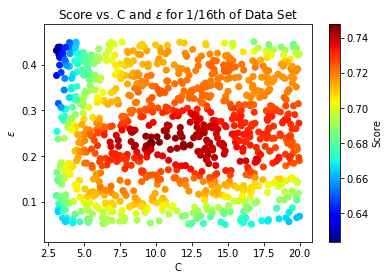

In [129]:
plt.scatter(Cs, epsilons, s=50, c=scores, cmap="jet", lw=0)
plt.xlabel('C')
plt.ylabel(r'$\epsilon$')
plt.colorbar(points, label='Score')
plt.title('Score vs. C and $\epsilon$ for 1/16th of Data Set')

Now use the ideal region for cross-validation on the full training set with less number of iterations.

In [128]:
param_distributions = {"C": uniform(7.5, 10), "epsilon":uniform(0.2,0.3)}
rnd_search_cv = RandomizedSearchCV(SVR(gamma=0.12), param_distributions, n_iter=30, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=12.18175148559203, epsilon=0.4852142919229748 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=12.18175148559203, epsilon=0.4852142919229748, total=   2.3s
[CV] C=12.18175148559203, epsilon=0.4852142919229748 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] .. C=12.18175148559203, epsilon=0.4852142919229748, total=   2.4s
[CV] C=12.18175148559203, epsilon=0.4852142919229748 .................
[CV] .. C=12.18175148559203, epsilon=0.4852142919229748, total=   2.3s
[CV] C=16.649924272642565, epsilon=0.379597545259111 .................
[CV] .. C=16.649924272642565, epsilon=0.379597545259111, total=   3.6s
[CV] C=16.649924272642565, epsilon=0.379597545259111 .................
[CV] .. C=16.649924272642565, epsilon=0.379597545259111, total=   3.5s
[CV] C=16.649924272642565, epsilon=0.379597545259111 .................
[CV] .. C=16.649924272642565, epsilon=0.379597545259111, total=   3.5s
[CV] C=9.450233005530457, epsilon=0.24679835610086082 ................
[CV] . C=9.450233005530457, epsilon=0.24679835610086082, total=   4.0s
[CV] C=9.450233005530457, epsilon=0.24679835610086082 ................
[CV] . C=9.450233005530457, epsilon=0.24679835610086082, total=   4.0s
[CV] C=9.450233005530457, epsilon=0.24679835610086082 ................
[CV] .

[CV] . C=16.05291283140196, epsilon=0.33204574812188037, total=   4.5s
[CV] C=9.025477935559735, epsilon=0.34855307303338107 ................
[CV] . C=9.025477935559735, epsilon=0.34855307303338107, total=   3.9s
[CV] C=9.025477935559735, epsilon=0.34855307303338107 ................
[CV] . C=9.025477935559735, epsilon=0.34855307303338107, total=   3.2s
[CV] C=9.025477935559735, epsilon=0.34855307303338107 ................
[CV] . C=9.025477935559735, epsilon=0.34855307303338107, total=   3.3s
[CV] C=7.92985651394023, epsilon=0.47279612062363463 .................
[CV] .. C=7.92985651394023, epsilon=0.47279612062363463, total=   2.4s
[CV] C=7.92985651394023, epsilon=0.47279612062363463 .................
[CV] .. C=7.92985651394023, epsilon=0.47279612062363463, total=   2.1s
[CV] C=7.92985651394023, epsilon=0.47279612062363463 .................
[CV] .. C=7.92985651394023, epsilon=0.47279612062363463, total=   2.0s
[CV] C=10.734749770000212, epsilon=0.39875668530619457 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  5.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma=0.12, kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=30, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2a8494a8>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2a849780>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [130]:
results = rnd_search_cv.cv_results_

Cs = np.array(results['param_C'], dtype=float)
epsilons = np.array(results['param_epsilon'], dtype=float)
scores = np.array(results['mean_test_score'], dtype=float)

Text(0.5, 1.0, 'Score vs. C and $\\epsilon$ for Entire Data Set')

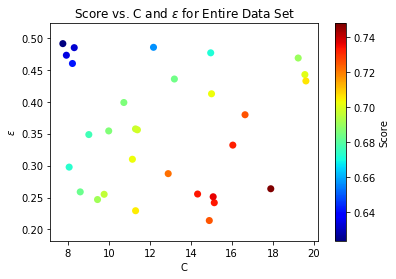

In [131]:
plt.scatter(Cs, epsilons, s=50, c=scores, cmap="jet", lw=0)
plt.xlabel('C')
plt.ylabel(r'$\epsilon$')
plt.colorbar(points, label='Score')
plt.title('Score vs. C and $\epsilon$ for Entire Data Set')

Now get RMSE

In [132]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5343265625636026

Evaluate on test set.

In [133]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5617162568801208

Not bad.